In [44]:
import pandas as pd
import numpy as np

In [45]:
df = pd.read_csv("https://raw.githubusercontent.com/bArryAllen6843/Predicting-Health-Insurance-Costs/refs/heads/main/insurance.csv")
df

,age,sex,bmi,children,smoker,region,charges
0,19.0,female,27.900,0.0,yes,southwest,16884.924
1,18.0,male,33.770,1.0,no,Southeast,1725.5523
2,28.0,male,33.000,3.0,no,southeast,$4449.462
3,33.0,male,22.705,0.0,no,northwest,$21984.47061
4,32.0,male,28.880,0.0,no,northwest,$3866.8552
...,...,...,...,...,...,...,...
1333,50.0,male,30.970,3.0,no,Northwest,$10600.5483
1334,-18.0,female,31.920,0.0,no,Northeast,2205.9808
1335,18.0,female,36.850,0.0,no,southeast,$1629.8335
1336,21.0,female,25.800,0.0,no,southwest,2007.945


## Clean the data

In [46]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [47]:
ins_filled = df.dropna()
ins_filled.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1208 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1208 non-null   float64
 1   sex       1208 non-null   object 
 2   bmi       1208 non-null   float64
 3   children  1208 non-null   float64
 4   smoker    1208 non-null   object 
 5   region    1208 non-null   object 
 6   charges   1208 non-null   object 
dtypes: float64(3), object(4)
memory usage: 75.5+ KB


In [48]:
ins_filled['region'].unique()

array(['southwest', 'Southeast', 'southeast', 'northwest', 'Northwest',
       'Northeast', 'northeast', 'Southwest'], dtype=object)

In [49]:
ins_filled['region'] = ins_filled['region'].apply(lambda x: x.lower() if x!="" else x)
ins_filled['region'].unique()

C:\Users\rashi\AppData\Local\Temp\ipykernel_18960\3219741992.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ins_filled['region'] = ins_filled['region'].apply(lambda x: x.lower() if x!="" else x)


array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [50]:
ins_filled['sex'].unique()

array(['female', 'male', 'woman', 'F', 'man', 'M'], dtype=object)

In [51]:
FEMALE = 'female'
MALE = 'male'
sex_map = {'F':FEMALE, 'woman':FEMALE, 'man':MALE, 'M':MALE}

In [52]:
ins_filled['sex'] = ins_filled['sex'].replace(sex_map)
ins_filled['sex'].unique()

C:\Users\rashi\AppData\Local\Temp\ipykernel_18960\3896050230.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ins_filled['sex'] = ins_filled['sex'].replace(sex_map)


array(['female', 'male'], dtype=object)

In [53]:
ins_filled['smoker'] = ins_filled['smoker'].apply(lambda x: True if x=='yes' else False)
ins_filled['smoker'].unique()

C:\Users\rashi\AppData\Local\Temp\ipykernel_18960\1327935878.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ins_filled['smoker'] = ins_filled['smoker'].apply(lambda x: True if x=='yes' else False)


array([ True, False])

In [54]:
ins_filled['charges'].sample(10)

758       5428.7277
714        2457.502
932       $10096.97
1261       3277.161
1060      1981.5819
1071    13974.45555
840        1526.312
373       36085.219
170     $13405.3903
375      18033.9679
Name: charges, dtype: object

In [55]:
ins_filled['charges'] = ins_filled['charges'].apply(lambda x: round(float(x.replace("$","")),2) if x!="" else x)
ins_filled['charges'].unique()

C:\Users\rashi\AppData\Local\Temp\ipykernel_18960\3570307938.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ins_filled['charges'] = ins_filled['charges'].apply(lambda x: round(float(x.replace("$","")),2) if x!="" else x)


array([16884.92,  1725.55,  4449.46, ...,  1629.83,  2007.94, 29141.36])

In [56]:
# To make sure every number is positive

ins_filled = ins_filled.apply(lambda x: x.abs() if np.issubdtype(x.dtype, np.number) else x)
ins_filled['age'].unique()

array([19., 18., 28., 33., 32., 31., 46., 37., 60., 25., 62., 23., 56.,
       27., 52., 30., 59., 63., 55., 22., 26., 35., 24., 41., 48., 36.,
       40., 58., 34., 43., 64., 20., 61., 53., 44., 57., 21., 45., 54.,
       38., 29., 49., 47., 51., 42., 50., 39.])

## Scaterplots of relationship between variables and charges

In [57]:
import matplotlib.pyplot as plt

df = ins_filled.copy(deep=True)

### age vs charges

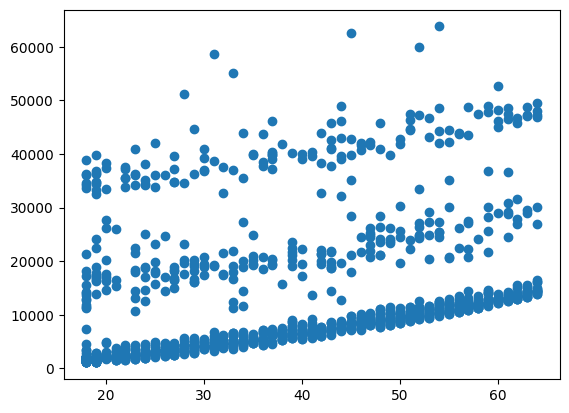

In [58]:
plt.scatter(df['age'], df['charges'])

### sex vs charges

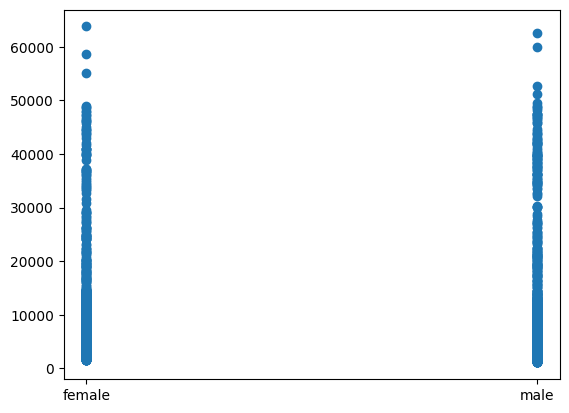

In [59]:
plt.scatter(df['sex'], df['charges'])

region vs charges

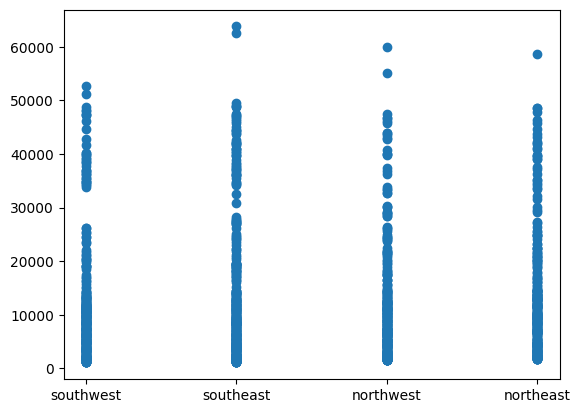

In [60]:
plt.scatter(df['region'], df['charges'])

### bmi vs charges

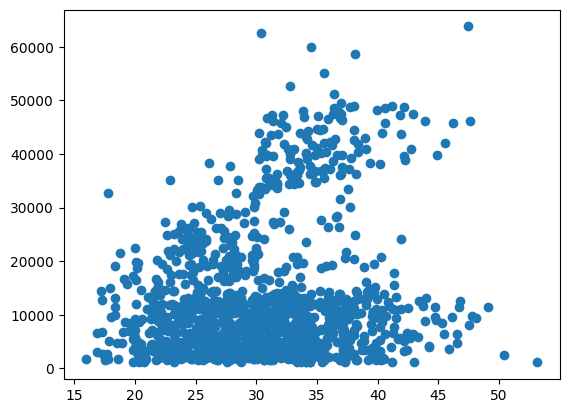

In [61]:
plt.scatter(df['bmi'], df['charges'])

### smoker vs charges

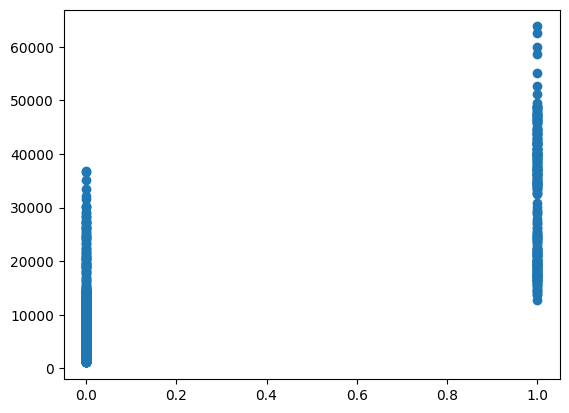

In [62]:
plt.scatter(df['smoker'], df['charges'])

## Prepare the data for a model fitting

In [63]:
# converting all string data to numbers using data encoding 

# northeast   northwest   southeast   southwest
#    1            0           0            0

In [68]:
df_new = pd.get_dummies(df, prefix=['region'], columns=['region'])
df_new['smoker'] = df_new['smoker'].astype('int64')
df_new['is_male'] = (df_new['sex'] == 'male').astype('int64')
df_new = df_new.drop(columns=['sex','region_southeast'])  # if three regions are 0 it means its definitely the fouth one 
df_new['region_northeast'] = df_new['region_northeast'].astype('int64')
df_new['region_northwest'] = df_new['region_northwest'].astype('int64')
df_new['region_southwest'] = df_new['region_southwest'].astype('int64')
df_new.head()

,age,bmi,children,smoker,charges,region_northeast,region_northwest,region_southwest,is_male
0,19.0,27.900,0.0,1,16884.92,0,0,1,0
1,18.0,33.770,1.0,0,1725.55,0,0,0,1
2,28.0,33.000,3.0,0,4449.46,0,0,0,1
3,33.0,22.705,0.0,0,21984.47,0,1,0,1
4,32.0,28.880,0.0,0,3866.86,0,1,0,1


In [82]:
df_new = df_new.dropna()

## Fitting a liner regression model to our dataframe

In [83]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score

In [101]:
# define input (features) and output variables (target)

X = df_new.drop(columns=['charges'])
y = df_new['charges']

In [102]:
# split the data into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [103]:
# create and train the linear regression model 
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [104]:
# make prediction on the test set
y_pred = model.predict(X_test)

In [105]:
# Calculate the R squared error
r2 = r2_score(y_test, y_pred)
r2

0.7049323223737738

## Implementing model creation and training

In [113]:
val_df = pd.read_csv("https://raw.githubusercontent.com/bArryAllen6843/Predicting-Health-Insurance-Costs/refs/heads/main/validation_dataset.csv")
val_df.head()

,age,sex,bmi,children,smoker,region
0,18.0,female,24.090000,1.0,no,southeast
1,39.0,male,26.410000,0.0,yes,northeast
2,27.0,male,29.150000,0.0,yes,southeast
3,71.0,male,65.502135,13.0,yes,southeast
4,28.0,male,38.060000,0.0,no,southeast


In [116]:
# see how model performs on validation dataset
def helper(df):
    df = df.dropna()
    df['smoker'] = df['smoker'].apply(lambda x: True if x=='yes' else False)
    df = df.apply(lambda x: x.abs() if np.issubdtype(x.dtype, np.number) else x)
    df = pd.get_dummies(df, prefix=['region'], columns=['region'])
    df['smoker'] = df['smoker'].astype('int64')
    df['is_male'] = (df['sex'] == 'male').astype('int64')
    df = df.drop(columns=['sex','region_southeast'])  # if three regions are 0 it means its definitely the fouth one 
    df['region_northeast'] = df['region_northeast'].astype('int64')
    df['region_northwest'] = df['region_northwest'].astype('int64')
    df['region_southwest'] = df['region_southwest'].astype('int64')
    return df

input_df = helper(val_df)
input_df.head()

,age,bmi,children,smoker,region_northeast,region_northwest,region_southwest,is_male
0,18.0,24.090000,1.0,0,0,0,0,0
1,39.0,26.410000,0.0,1,1,0,0,1
2,27.0,29.150000,0.0,1,0,0,0,1
3,71.0,65.502135,13.0,1,0,0,0,1
4,28.0,38.060000,0.0,0,0,0,0,1


In [120]:
predictions = model.predict(input_df)

In [122]:
validation_data = val_df.copy(deep=True)
validation_data['predicted_charges'] = predictions
validation_data.loc[validation_data['predicted_charges'] < 1000, 'predicted_charges'] = 1000
validation_data.head()

,age,sex,bmi,children,smoker,region,predicted_charges
0,18.0,female,24.090000,1.0,no,southeast,1000.000000
1,39.0,male,26.410000,0.0,yes,northeast,30956.214906
2,27.0,male,29.150000,0.0,yes,southeast,27799.409518
3,71.0,male,65.502135,13.0,yes,southeast,57194.416073
4,28.0,male,38.060000,0.0,no,southeast,6685.426328


In [123]:
validation_data

,age,sex,bmi,children,smoker,region,predicted_charges
0,18.0,female,24.090000,1.0,no,southeast,1000.000000
1,39.0,male,26.410000,0.0,yes,northeast,30956.214906
2,27.0,male,29.150000,0.0,yes,southeast,27799.409518
3,71.0,male,65.502135,13.0,yes,southeast,57194.416073
4,28.0,male,38.060000,0.0,no,southeast,6685.426328
5,70.0,female,72.958351,11.0,yes,southeast,58677.839802
6,29.0,female,32.110000,2.0,no,northwest,7044.405922
7,42.0,female,41.325000,1.0,no,northeast,13065.658469
8,48.0,female,36.575000,0.0,no,northwest,12665.703596
9,63.0,male,33.660000,3.0,no,southeast,16142.541031
